## SQP optimization algorithm

In [1]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy.linalg import inv
import matplotlib
matplotlib.rcParams['text.usetex'] = True

**Sequential Quadratic Programming (SQP)** methods are based on approximating the function $f(x)$ we want to optimize with a qudratic function (parabola) in an iterative fashion. Here we give an example for a function with one variable. To define a parabola we need three points. 
1. The algorithm starts with a "good" guess $x^o$ for  $x$ and generates three points $(x^o_i,f(x^o_i))$ for $i=1,...,3$. 

2. A parabola is interpolated through these three points and the minimum $\bar{x}$ is found. 

3. The point $(\bar{x},f(\bar{x}))$ is the new starting point on the $f(x)$ curve. 

4. The algorithm then evaluates the derivative of $f$ at this point. If it is positive ($f$ is increasing) the new triplet $x^n$ is constructed by subtracting a step from $\bar{x}$, e.g. $x^n_1=\bar{x}, x^n_2=\bar{x}-s,x^n_3=\bar{x}-2s)$ where $s$ is the step. If the derivative is negative the new triplet is constructed by adding a step to $\bar{x}$.

5. Go to step 2 and repeat until a stopping criterion has been met.

The stopping criterion of Step 5 can be a tolerance in the improvement of the optimal value of $f(x)$ or  $\bar{x}$ itself.

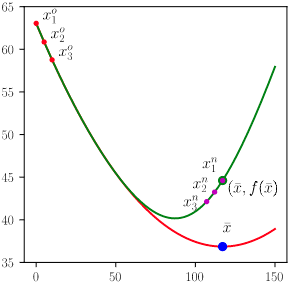


### Define the function to minimize


In [2]:
def f(x):
    f=(1/7)*math.sqrt(2500+x**2)+0.5*math.sqrt(2500+(100-x)**2)
    return f

### Plot the function

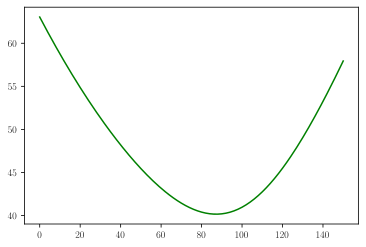

In [3]:
%matplotlib inline
p=[i for i in range(0,151)]
v=[f(j) for j in p]
plt.plot(p,v,'g')

### Methods

The following method returns the coefficients of a quadratic form 

pv[0] $x^2$ + pv[1] $x$ + pv[2]

that passes through three points. 

`xin` is the list of the three $x$ coordinates 

`yin` is the list of the three $y$ coordinates

In [4]:
def parab(xin,fin):
    a=np.array([[xin[0]**2,xin[0],1],[xin[1]**2,xin[1],1],[xin[2]**2,xin[2],1]])
    pv=np.matmul(inv(a),fin)
    #print(pv)
    return pv

The following method executes one iteration of the algorithm.

`xin` the input is a list of the $x$ coordinates of three points

`xmin, ymin, pv` the output is the parabola `pv` as described above and it's minimum `xmin,ymin`

In [5]:
def do_iteration(xin):
    fin=[f(x) for x in xin]
    pv=parab(xin,fin)
    #print(pv)
    xmin=-pv[1]/(2*pv[0])
    fmin=f(xmin)
    return xmin,fmin,pv

The following method plots the original function the latest parabola and the new solution point.

In [6]:
def plot_iteration(it,pv,xs,ys,ax):
    xp=[i for i in range(0,151)]
    fp=[pv[0]*j**2+pv[1]*j+pv[2] for j in xp]
    pvmin=pv[0]*xmin[it]**2+pv[1]*xmin[it]+pv[2]
    ax.plot(xp,fp,color='r')
    ax.plot(xmin[it],pvmin,'bo')
    ax.set_title('Iter '+str(it))
    ax.set_ylim(35,65)
    ax.plot(p,v,color='g')
    ax.plot(xmin[it],fmin[it],'go')
    ax.plot(xs,ys,'ro',markersize=3)

# Code below is used to annotate the chart only for the first iteration    
    if (it == 0):
        ax.annotate(r"$\bar{x}$",
            xy=(xmin[it],pvmin+3), xycoords='data',horizontalalignment='left', verticalalignment='top',
            fontsize=12)
        ax.annotate(r"$(\bar{x},f(\bar{x})$",
            xy=(xmin[it]+3,fmin[it]), xycoords='data',horizontalalignment='left', verticalalignment='top',
            fontsize=12)
        ax.annotate(r"$x^o_1$",
            xy=(xs[0]+4,ys[0]), xycoords='data',horizontalalignment='left', verticalalignment='bottom',
            fontsize=12)
        ax.annotate(r"$x^o_2$",
            xy=(xs[1]+4,ys[1]), xycoords='data',horizontalalignment='left', verticalalignment='bottom',
            fontsize=12)
        ax.annotate(r"$x^o_3$",
            xy=(xs[2]+4,ys[2]), xycoords='data',horizontalalignment='left', verticalalignment='bottom',
            fontsize=12)
        ax.plot([xmin[it],xmin[it]-s,xmin[it]-2*s],[f(xmin[it]),f(xmin[it]-s),f(xmin[it]-2*s)],'mo',markersize=3)
        ax.annotate("$x^n_1$",
            xy=(xmin[it]-3,f(xmin[it])+1), xycoords='data',horizontalalignment='right', verticalalignment='bottom',
            fontsize=12)
        ax.annotate(r"$x^n_2$",
            xy=(xmin[it]-s-4,f(xmin[it]-s)), xycoords='data',horizontalalignment='right', verticalalignment='bottom',
            fontsize=12)
        ax.annotate(r"$x^n_3$",
            xy=(xmin[it]-2*s-5,f(xmin[it]-2*s)-1), xycoords='data',horizontalalignment='right', verticalalignment='bottom',
            fontsize=12)



Here we specify `eps` to be the tolerance for the optimal solution. We are executing a loop as long as two consecutive values of the objective function differ more than the tolerance. If the derivative `der` at the new found point `xmi` is positive we need to decrease $x$, otherwise we need to increase it. After convergence we plot each iteration. 

The parameters to change are:

* `eps` the tolerance
* `s` the step to move from the current point. If the current point is `xmi` and we are increasing then the new triplet will be `[xmi, xmi+s, xmi+2*s]`
* `xstart` initial guess value

The graphs for each iteration have the red points that define the red parabola. The minimum of the prabola is at the blue point which gives us the green point on the original function (green). This point is the starting point for the new triad.

0 117.0932114887377 44.60934824298742 117.0932114887377
1 85.65501935178034 40.17719953639147 31.438192136957355
2 87.22439021533927 40.16589602761378 1.5693708635589303
3 87.34105392956806 40.165978871242324 0.11666371422879251
4 87.33132206983109 40.16596704070809 0.009731859736973547
5 87.3321226037176 40.16596798005908 0.0008005338865046951
6 87.33205667525918 40.165967902469184 6.592845841169037e-05
7 87.33206210430653 40.16596790885697 5.429047348570748e-06
8 87.33206165723958 40.16596790833094 4.4706695234708604e-07


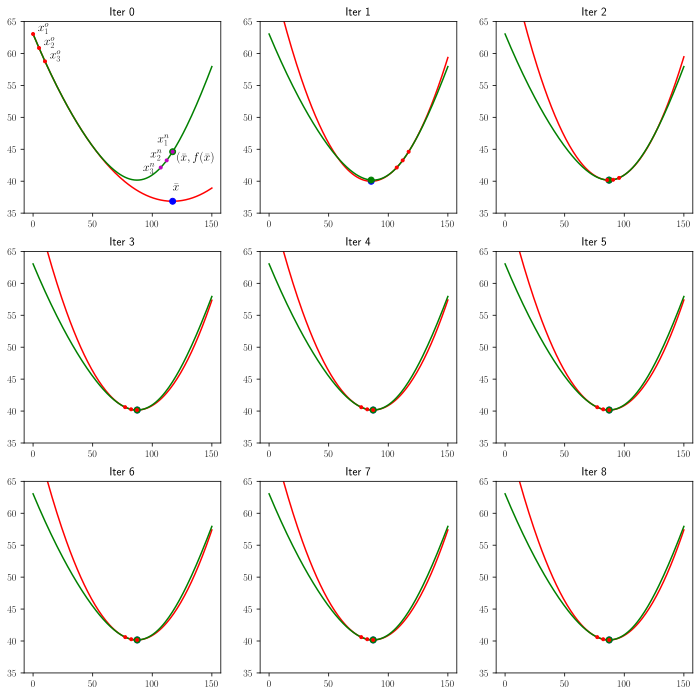

In [7]:
eps=0.0001
s=5
xstart=0
xmin=[]
fmin=[]
xins=[]
xin=[xstart,xstart+s,xstart+2*s]
xins.append(xin)
itr=0
delta=100
pxmin=xin[0]
intpvs=[]
while delta > 0.000001:
    xmi,fmi,pv=do_iteration(xin)
    xmin.append(xmi)
    fmin.append(fmi)
    #plot_iteration(pv)
    intpvs.append(pv)
    der=(f(xmi+eps)-f(xmi-eps))/(2*eps)
    if (der > 0):
        xin=[xmi,xmi-s,xmi-2*s]
    else:
        xin=[xmi,xmi+s,xmi+2*s]
    xins.append(xin)
    delta=abs(xmi-pxmin)
    pxmin=xmi
    print(itr,xmi,fmi,delta)
    itr=itr+1
    #plt.show()
    #time.sleep(10)
frows=int((itr-1)/3)+1
fig = plt.figure(figsize=(12,12))
for it in range(0,itr):
    ax1 = fig.add_subplot(frows,3,it+1)
    xs=xins[it]
    ys=[f(xi) for xi in xs]
    plot_iteration(it,intpvs[it],xs,ys,ax1)
    

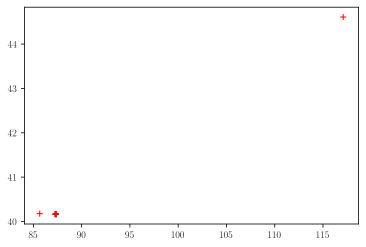

In [8]:
plt.plot(xmin,fmin,'r+')

In [9]:
%matplotlib notebook
def animate(it):
    pv=intpvs[it]
    xp=[i for i in range(0,151)]
    fp=[pv[0]*j**2+pv[1]*j+pv[2] for j in xp]
    plt.plot(xp,fp,color='r')
    #plt.set_title('Iter '+str(it))
    plt.plot(p,v,color='g')
    plt.plot(xmin[it],fmin[it],'bo')


<IPython.core.display.Javascript object>


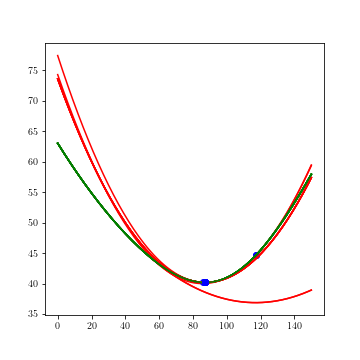

In [13]:
figa=plt.figure(figsize=(5,5))
#for it in range(0,itr):
#    ax1 = fig.add_subplot(frows,3,it+1)
#    plot_iteration(it,intpvs[it],ax1)
ani = animation.FuncAnimation(figa, animate,interval=2000)